In [1]:
import pandas as pd

df = pd.read_csv('/kaggle/input/flight-price-prediction/Clean_Dataset.csv')

In [2]:
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [3]:
df.airline.value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [4]:
df.source_city.value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [5]:
df.destination_city.value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

In [6]:
df.departure_time.value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

In [7]:
df.arrival_time.value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

In [8]:
df.stops.value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

In [9]:
df['class'].value_counts()

class
Economy     206666
Business     93487
Name: count, dtype: int64

In [10]:
df['duration'].min()

0.83

In [11]:
df['duration'].max()

49.83

In [12]:
df['duration'].median()

11.25

## Preprocissing

In [13]:
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('flight', axis=1)
df['class'] = df['class'].apply(lambda x: 1 if x== 'Business' else 0).astype(int)

In [14]:
df.stops = pd.factorize(df.stops)[0]

In [15]:
# Convert categorical columns to dummy variables and ensure they are integers
df = df.join(pd.get_dummies(df.airline, prefix='airline').astype(int)).drop('airline', axis=1)
df = df.join(pd.get_dummies(df.source_city, prefix='source').astype(int)).drop('source_city', axis=1)
df = df.join(pd.get_dummies(df.destination_city, prefix='dest').astype(int)).drop('destination_city', axis=1)
df = df.join(pd.get_dummies(df.arrival_time, prefix='arrival').astype(int)).drop('arrival_time', axis=1)
df = df.join(pd.get_dummies(df.departure_time, prefix='departure').astype(int)).drop('departure_time', axis=1)

In [16]:
df

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night,departure_Afternoon,departure_Early_Morning,departure_Evening,departure_Late_Night,departure_Morning,departure_Night
0,0,0,2.17,1,5953,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
1,0,0,2.33,1,5953,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
2,0,0,2.17,1,5956,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,2.25,1,5955,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,2.33,1,5955,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,69265,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
300149,1,1,10.42,49,77105,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
300150,1,1,13.83,49,79099,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
300151,1,1,10.00,49,81585,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


## Training regresstion model

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

x, y = df.drop('price', axis=1), df.price

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [19]:
Reg = RandomForestRegressor(n_jobs=-1)
Reg.fit(x_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [20]:
Reg.score(x_test, y_test)

0.9858049472812919

## Evaluating Model

In [21]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = Reg.predict(x_test)
print('R2:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', math.sqrt(mean_squared_error(y_test, y_pred)))

R2: 0.9858049472812919
MAE: 1057.2774345853845
MSE: 7299613.852344268
RMSE: 2701.7797564465295


Text(0.5, 1.0, 'Predection VS Acual price')

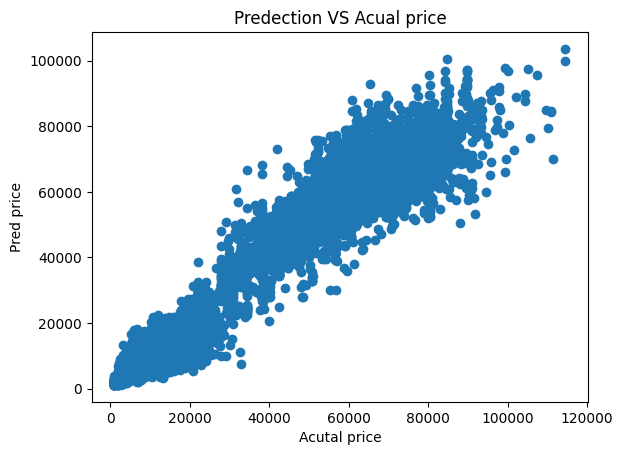

In [22]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('Acutal price')
plt.ylabel('Pred price')
plt.title('Predection VS Acual price')


In [23]:
df.price.describe()

count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64

In [24]:
importances = dict(zip(Reg.feature_names_in_, Reg.feature_importances_))
sorted_importances = sorted(importances.items(), key=lambda x: x[1], reverse=True)
sorted_importances

[('class', 0.8801184407280863),
 ('duration', 0.05709168011924721),
 ('days_left', 0.018777711489526703),
 ('airline_Air_India', 0.004991867035407445),
 ('airline_Vistara', 0.004974247615647303),
 ('source_Delhi', 0.003537612193803365),
 ('dest_Delhi', 0.0033603300424625577),
 ('source_Mumbai', 0.0022206068719610988),
 ('dest_Mumbai', 0.001925351905942458),
 ('dest_Kolkata', 0.0018745393082477669),
 ('stops', 0.0018161154077009389),
 ('source_Kolkata', 0.001723010088731007),
 ('dest_Hyderabad', 0.0015449307991373888),
 ('arrival_Evening', 0.0014746015639257465),
 ('dest_Bangalore', 0.0012953514440019345),
 ('source_Hyderabad', 0.0012676831934950298),
 ('arrival_Night', 0.0011849167359964587),
 ('departure_Evening', 0.0011406061728466256),
 ('source_Bangalore', 0.0011204366412308746),
 ('arrival_Afternoon', 0.0010228083914667122),
 ('source_Chennai', 0.0009697802390932214),
 ('departure_Morning', 0.0008848726865416368),
 ('dest_Chennai', 0.0008729653768591167),
 ('departure_Afternoon', 

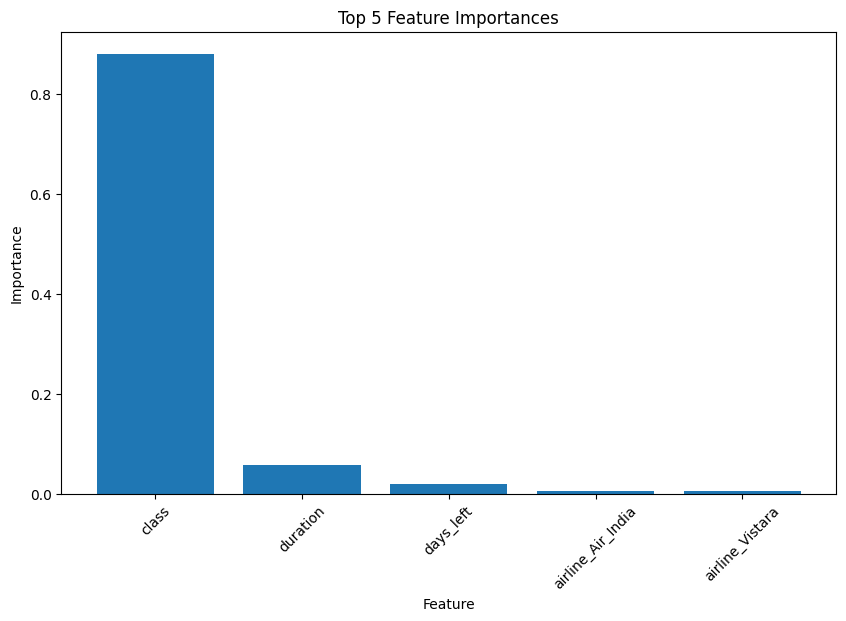

In [25]:
import matplotlib.pyplot as plt

features = [x[0] for x in sorted_importances[:5]]
importances = [x[1] for x in sorted_importances[:5]]

plt.figure(figsize=(10, 6))
plt.bar(features, importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 5 Feature Importances')
plt.xticks(rotation=45) 
plt.show()


## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

Reg = RandomForestRegressor(n_jobs=-1)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 5, 4],
    'max_features': [1.0, 'sqrt']
}

grid_search = GridSearchCV(Reg, param_grid, cv=5)
grid_search.fit(x_train, y_train)


best_params = grid_search.best_params_
print("Best parameters found: ", best_params)
